### Notebook for analysis of FL and OD data for LEMOS experiments

In [1]:
## import here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
#from scipy.integrate import cumtrapz

In [2]:
## import the datafiles 

FL_data = pd.read_csv('fl.csv')
OD_data = pd.read_csv('od.csv')
N_size = len(FL_data)
N_replicates = 3

# Replace 'OVERFLW' with 100000 in all columns of FL_data and OD_data
FL_data.replace("OVRFLW", int(100000), inplace = True)
OD_data.replace("OVRFLW", int(1), inplace = True)

FL_data = FL_data.apply(pd.to_numeric, errors='coerce')
# print(FL_data.dtypes)

/var/folders/bd/k7y80z4j48vdkp54l1pg7vp40000gr/T/ipykernel_32824/2794649115.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  OD_data.replace("OVRFLW", int(1), inplace = True)


In [3]:
## Process the data files 
# define what samples are in what well
neg_wells = ['H11']
green_constant = ['B9', 'C9', 'D9']
red_constant = ['E9', 'F9', 'G9']
set_point_2_PI = ['B11',  'C11', 'D11']
set_point_1_PI = ['E11', 'F11', 'G11']

blank = ['A9']
st_pt_1 = 11500
st_pt_2 = 18500


## Sort the OD data

#blank_OD = OD_data[blank[0]].to_numpy()[0]*1 
# blank_OD = 0.13
blank_OD_array = 0.105 * np.ones(16) # replace this line with the array in the python code
# blank_OD_array = np.array([0.118, 0.145, 0.145, 0.145, 0.122, 0.182, 0.197, 0.145, 0.145, 0.155, 0.190, 
# 0.200, 0.138, 0.128, 0.134, 0.000])
blank_neg_wells = [blank_OD_array[0]]
blank_set_point_2_PI  = blank_OD_array[[1, 2, 3]]
blank_set_point_1_PI  = blank_OD_array[[4, 5, 6]]
blank_set_point_2 = blank_OD_array[[14, 13, 12]]
blank_set_point_1 = blank_OD_array[[11, 10, 9]]
blank_green_constant = blank_OD_array[[14, 13, 12]]
blank_red_constant = blank_OD_array[[11, 10, 9]]


neg_ctrl_OD = np.zeros((len(neg_wells),N_size))
for i in range(len(neg_wells)):
    neg_ctrl_OD[i,:] = OD_data[neg_wells[i]].to_numpy() - blank_neg_wells[i]

green_constant_OD = np.zeros((len(green_constant),N_size))
for i in range(len(green_constant)):
    green_constant_OD[i,:] = OD_data[green_constant[i]].to_numpy() - blank_green_constant[i]

red_constant_OD = np.zeros((len(red_constant),N_size))
for i in range(len(red_constant)):
    red_constant_OD[i,:] = OD_data[red_constant[i]].to_numpy() - blank_red_constant[i]

set_point_1_PI_OD = np.zeros((len(set_point_1_PI),N_size))
for i in range(len(set_point_1_PI)):
    set_point_1_PI_OD[i,:] = OD_data[set_point_1_PI[i]].to_numpy() - blank_set_point_1[i]

set_point_2_PI_OD = np.zeros((len(set_point_2_PI),N_size))
for i in range(len(set_point_2_PI)):
    set_point_2_PI_OD[i,:] = OD_data[set_point_2_PI[i]].to_numpy() - blank_set_point_2[i]

## Sort FL data

## Sort the OD data

blank_FL = FL_data[blank[0]].to_numpy()[0] 

neg_ctrl_FL = np.zeros((len(neg_wells),N_size))
for i in range(len(neg_wells)):
    neg_ctrl_FL[i,:] = FL_data[neg_wells[i]].to_numpy() - blank_FL

green_constant_FL = np.zeros((len(green_constant),N_size))
for i in range(len(green_constant)):
    green_constant_FL[i,:] = FL_data[green_constant[i]].to_numpy() - blank_FL

red_constant_FL = np.zeros((len(red_constant),N_size))
for i in range(len(red_constant)):
    red_constant_FL[i,:] = FL_data[red_constant[i]].to_numpy() - blank_FL

set_point_1_PI_FL = np.zeros((len(set_point_1_PI),N_size))
for i in range(len(set_point_1_PI)):
    set_point_1_PI_FL[i,:] = FL_data[set_point_1_PI[i]].to_numpy() - blank_FL

set_point_2_PI_FL = np.zeros((len(set_point_2_PI),N_size))
for i in range(len(set_point_2_PI)):
    set_point_2_PI_FL[i,:] = FL_data[set_point_2_PI[i]].to_numpy() - blank_FL

In [4]:
## Estimate the FL/OD

# Estimate the neg-control FL/OD 

neg_ctrl_FL_by_OD = np.zeros((len(neg_wells),N_size))
for i in range(len(neg_wells)):
    neg_ctrl_FL_by_OD[i,:] = neg_ctrl_FL[i, :]/neg_ctrl_OD[i, :]

neg_ctrl_FL_by_OD_avg = np.mean(neg_ctrl_FL_by_OD, axis = 0)

green_constant_FL_by_OD = np.zeros((len(green_constant),N_size))
for i in range(len(green_constant)):
    green_constant_FL_by_OD[i,:] = green_constant_FL[i, :]/green_constant_OD[i, :] - neg_ctrl_FL_by_OD_avg

red_constant_FL_by_OD = np.zeros((len(red_constant),N_size))
for i in range(len(red_constant)):
    red_constant_FL_by_OD[i,:] = red_constant_FL[i, :]/red_constant_OD[i, :] - neg_ctrl_FL_by_OD_avg

set_point_1_PI_FL_by_OD = np.zeros((len(set_point_1_PI),N_size))
for i in range(len(set_point_1_PI)):
    set_point_1_PI_FL_by_OD[i,:] = set_point_1_PI_FL[i, :]/set_point_1_PI_OD[i, :] - neg_ctrl_FL_by_OD_avg

set_point_2_PI_FL_by_OD = np.zeros((len(set_point_2_PI),N_size))
for i in range(len(set_point_2_PI)):
    set_point_2_PI_FL_by_OD[i,:] = set_point_2_PI_FL[i, :]/set_point_2_PI_OD[i, :] - neg_ctrl_FL_by_OD_avg

### Plot the Data:

In [5]:
# define the time vector

interval = 10 # min
time = range(interval, (N_size + 1) * interval, interval)
xlimit = 16*60

# define color dictionary 

color_dict = {'neg_ctrl':'k', 'green_constant':'g', 'red_constant':'r', 
              'set_point_1_PI':'#6759d4', 'set_point_2_PI':'#ebab4b'}

(0.0, 960.0)

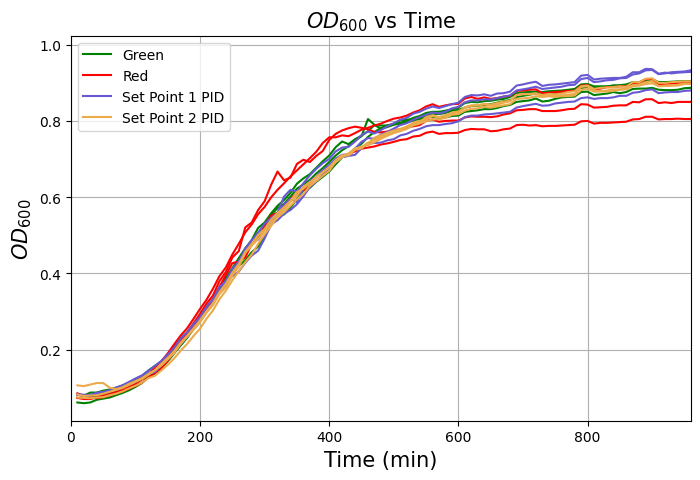

In [6]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5


# for i in range(len(neg_wells)):
#     # Add label only for the first replicate
#     if i == 0:
#         ax.plot(time, neg_ctrl_OD[i, :], '--', color = color_dict['neg_ctrl'], label = 'Negative Control')#, s = size)
#     else:
#         ax.plot(time, neg_ctrl_OD[i, :], '--', color=color_dict['neg_ctrl'])#, s = size)

for i in range(len(green_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, green_constant_OD[i, :], color = color_dict['green_constant'], label = 'Green')#, s = size)

    else:
        ax.plot(time, green_constant_OD[i, :], color = color_dict['green_constant'])#, s = size)

for i in range(len(red_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, red_constant_OD[i, :], color = color_dict['red_constant'], label = 'Red')#, s = size)

    else:
        ax.plot(time, red_constant_OD[i, :], color = color_dict['red_constant'])#, s = size)

for i in range(len(set_point_1_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_1_PI_OD[i, :], color = color_dict['set_point_1_PI'], label = 'Set Point 1 PID')#, s = size)

    else:
        ax.plot(time, set_point_1_PI_OD[i, :], color = color_dict['set_point_1_PI'])#, s = size)

for i in range(len(set_point_2_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_2_PI_OD[i, :], color = color_dict['set_point_2_PI'], label = 'Set Point 2 PID')#, s = size)

    else:
        ax.plot(time, set_point_2_PI_OD[i, :], color = color_dict['set_point_2_PI'])#, s = size)

ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel(r'$OD_{600}$', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('$OD_{600}$ vs Time', fontsize = ft)
ax.set_xlim((0, xlimit))

(0.0, 960.0)

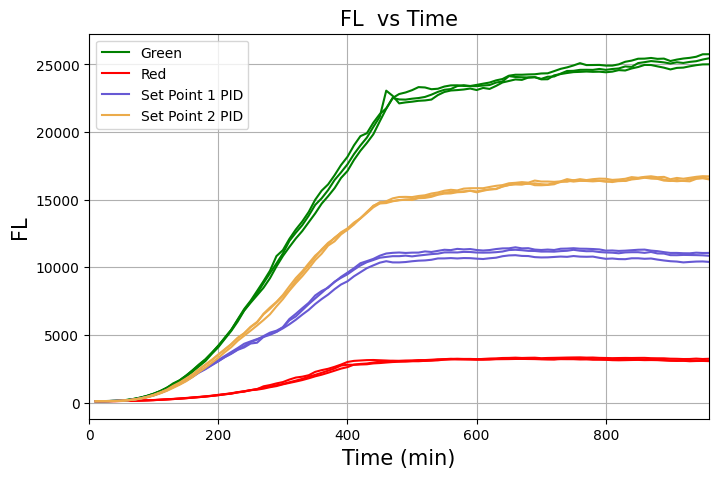

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5

# for i in range(len(neg_wells)):
#     # Add label only for the first replicate
#     if i == 0:
#         ax.plot(time, neg_ctrl_FL[i, :], '--', color = color_dict['neg_ctrl'], label = 'Negative Control')#, s = size)
#     else:
#         ax.plot(time, neg_ctrl_FL[i, :], '--', color=color_dict['neg_ctrl'])#, s = size)

for i in range(len(green_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, green_constant_FL[i, :], color = color_dict['green_constant'], label = 'Green')#, s = size)

    else:
        ax.plot(time, green_constant_FL[i, :], color = color_dict['green_constant'])#, s = size)

for i in range(len(red_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, red_constant_FL[i, :], color = color_dict['red_constant'], label = 'Red')#, s = size)

    else:
        ax.plot(time, red_constant_FL[i, :], color = color_dict['red_constant'])#, s = size)

for i in range(len(set_point_1_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_1_PI_FL[i, :], color = color_dict['set_point_1_PI'], label = 'Set Point 1 PID')#, s = size)

    else:
        ax.plot(time, set_point_1_PI_FL[i, :], color = color_dict['set_point_1_PI'])#, s = size)

for i in range(len(set_point_2_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_2_PI_FL[i, :], color = color_dict['set_point_2_PI'], label = 'Set Point 2 PID')#, s = size)

    else:
        ax.plot(time, set_point_2_PI_FL[i, :], color = color_dict['set_point_2_PI'])#, s = size)

ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel('FL', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('FL  vs Time', fontsize = ft)
ax.set_xlim((0, xlimit))

(0.0, 960.0)

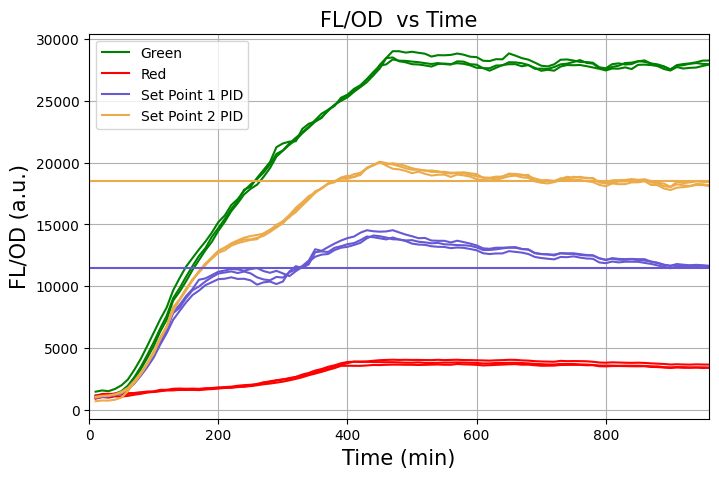

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5

# for i in range(len(neg_wells)):
#     # Add label only for the first replicate
#     if i == 0:
#         ax.plot(time, neg_ctrl_FL_by_OD[i, :], '--', color = color_dict['neg_ctrl'], label = 'Negative Control')#, s = size)
#     else:
#         ax.plot(time, neg_ctrl_FL_by_OD[i, :], '--', color=color_dict['neg_ctrl'])#, s = size)

for i in range(len(green_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, green_constant_FL_by_OD[i, :], color = color_dict['green_constant'], label = 'Green')#, s = size)

    else:
        ax.plot(time, green_constant_FL_by_OD[i, :], color = color_dict['green_constant'])#, s = size)

for i in range(len(red_constant)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, red_constant_FL_by_OD[i, :], color = color_dict['red_constant'], label = 'Red')#, s = size)

    else:
        ax.plot(time, red_constant_FL_by_OD[i, :], color = color_dict['red_constant'])#, s = size)

for i in range(len(set_point_1_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_1_PI_FL_by_OD[i, :], color = color_dict['set_point_1_PI'], label = 'Set Point 1 PID')#, s = size)

    else:
        ax.plot(time, set_point_1_PI_FL_by_OD[i, :], color = color_dict['set_point_1_PI'])#, s = size)

for i in range(len(set_point_2_PI)):
    # Add label only for the first replicate
    if i == 0:
        ax.plot(time, set_point_2_PI_FL_by_OD[i, :], color = color_dict['set_point_2_PI'], label = 'Set Point 2 PID')#, s = size)

    else:
        ax.plot(time, set_point_2_PI_FL_by_OD[i, :], color = color_dict['set_point_2_PI'])#, s = size)

ax.axhline(st_pt_1, xmin = 0, xmax = 1, color = color_dict['set_point_1_PI'])
ax.axhline(st_pt_2, xmin = 0, xmax = 1, color = color_dict['set_point_2_PI'])


ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel('FL/OD (a.u.)', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('FL/OD  vs Time', fontsize = ft)
ax.set_xlim((0, xlimit))

In [9]:
red_constant_avg = np.mean(red_constant_FL_by_OD, axis = 0)
green_constant_avg = np.mean(green_constant_FL_by_OD, axis = 0)
set_point_1_PI_avg = np.mean(set_point_1_PI_FL_by_OD, axis = 0)
set_point_2_PI_avg = np.mean(set_point_2_PI_FL_by_OD, axis = 0)

red_constant_std_dev = np.std(red_constant_FL_by_OD, axis = 0)
green_constant_std_dev = np.std(green_constant_FL_by_OD, axis = 0)
set_point_1_PI_std_dev = np.std(set_point_1_PI_FL_by_OD, axis = 0)
set_point_2_PI_std_dev = np.std(set_point_2_PI_FL_by_OD, axis = 0)

(0.0, 960.0)

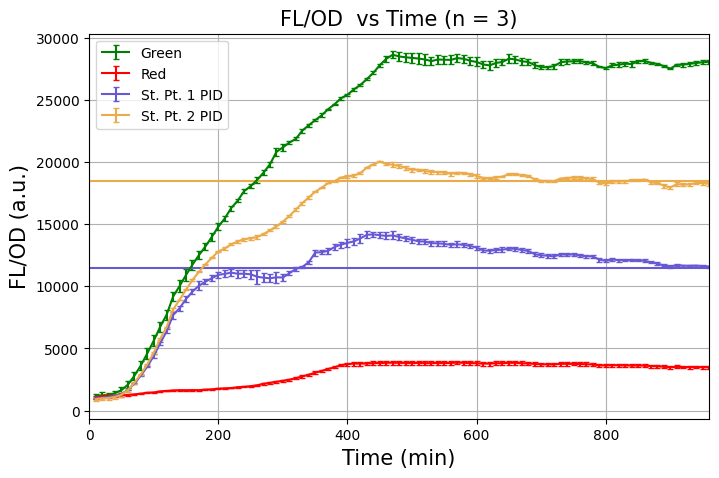

In [10]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

size = 5

ax.errorbar(time, green_constant_avg, yerr = green_constant_std_dev, color = color_dict['green_constant'], label = 'Green', capsize = 2)
ax.errorbar(time, red_constant_avg, yerr = red_constant_std_dev, color = color_dict['red_constant'], label = 'Red', capsize = 2)
ax.errorbar(time, set_point_1_PI_avg, yerr = set_point_1_PI_std_dev, color = color_dict['set_point_1_PI'], label = 'St. Pt. 1 PID', capsize = 2)
ax.errorbar(time, set_point_2_PI_avg, yerr = set_point_2_PI_std_dev, color = color_dict['set_point_2_PI'], label = 'St. Pt. 2 PID', capsize = 2)
     
ax.axhline(st_pt_1, xmin = 0, xmax = 1, color = color_dict['set_point_1_PI'])
ax.axhline(st_pt_2, xmin = 0, xmax = 1, color = color_dict['set_point_2_PI'])


ax.legend()
ax.grid(True)
ft = 15
ax.set_ylabel('FL/OD (a.u.)', fontsize = ft)
ax.set_xlabel('Time (min)', fontsize = ft)
ax.set_title('FL/OD  vs Time (n = 3)', fontsize = ft)
ax.set_xlim((0, xlimit))

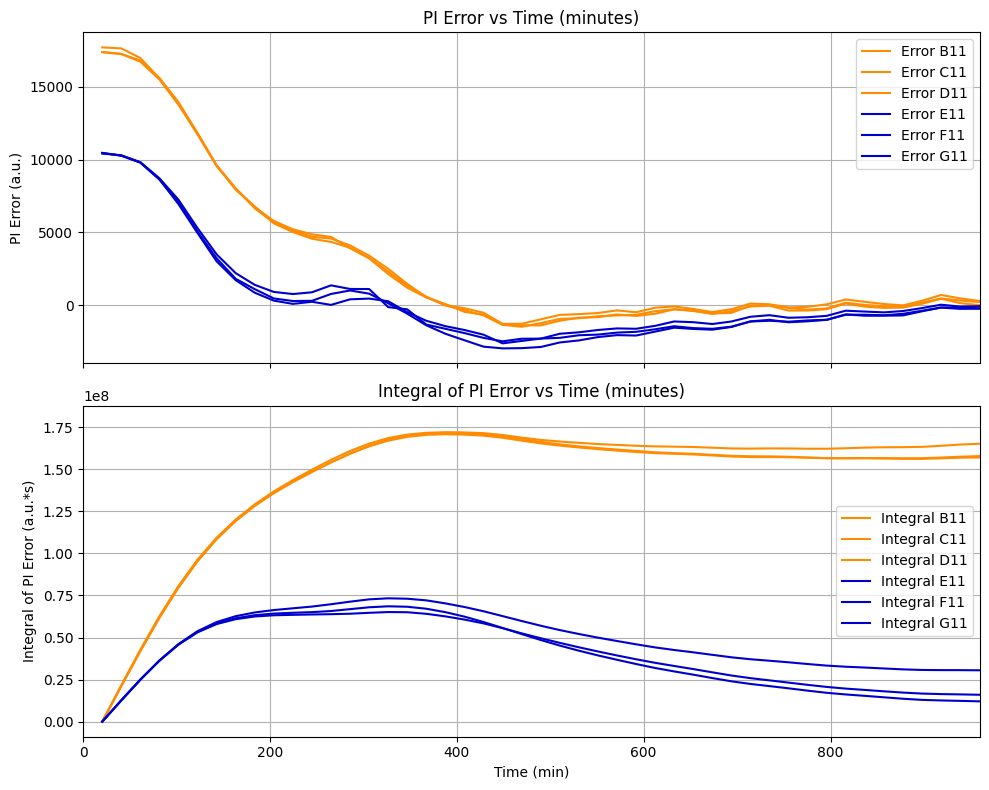

In [11]:
# Load pi_errors.csv
pid_errors_df = pd.read_csv('errors.csv')

# Convert time to minutes for plotting
pid_errors_df['time_min'] = pid_errors_df['time'] / 60

# Define color map for wells
well_color = {
    'E11': 'mediumblue',   # set_point_2_PI
    'F11': 'mediumblue',   
    'G11': 'mediumblue',
    'B11': 'darkorange',  # set_point_1_PI
    'C11': 'darkorange',
    'D11': 'darkorange'
}

# Custom trapezoidal integration function (cumulative)
def compute_cumulative_integral(times, errors):
    integral = np.zeros_like(errors)
    for i in range(1, len(times)):
        dt = times[i] - times[i - 1]
        avg_err = 0.5 * (errors[i] + errors[i - 1])
        integral[i] = integral[i - 1] + avg_err * dt
    return integral
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot PI error vs time
for well in ['B11', 'C11', 'D11', 'E11', 'F11', 'G11']:
    ax[0].plot(pid_errors_df['time_min'], pid_errors_df[well], label=f'Error {well}', color=well_color[well])

ax[0].set_ylabel('PI Error (a.u.)')
ax[0].set_title('PI Error vs Time (minutes)')
ax[0].grid(True)
ax[0].legend()
ax[0].set_xlim(0, 960)

# Plot Integral of PI error vs time
for well in ['B11', 'C11', 'D11', 'E11', 'F11', 'G11']:
    error = pid_errors_df[well].fillna(0).values
    time_sec = pid_errors_df['time'].values
    integral = compute_cumulative_integral(time_sec, error)
    ax[1].plot(pid_errors_df['time_min'], integral, label=f'Integral {well}', color=well_color[well])

ax[1].set_xlabel('Time (min)')
ax[1].set_ylabel('Integral of PI Error (a.u.*s)')
ax[1].set_title('Integral of PI Error vs Time (minutes)')
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlim(0, 960)

plt.tight_layout()
plt.show()

In [12]:
# # Load data
# pid_errors_df = pd.read_csv('errors.csv')

# # Convert time to minutes for plotting
# pid_errors_df['time_min'] = pid_errors_df['time'] / 60

# # Define color map for wells
# well_color = {
#     'E9': 'mediumblue',   # set_point_2_PID
#     'F9': 'mediumblue',   
#     'G9': 'mediumblue',
#     'B9': 'darkorange',  # set_point_1_PID
#     'C9': 'darkorange',
#     'D9': 'darkorange'
# }

# # Create 3 subplots
# fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# # Plot PI error vs time
# for well in ['B9', 'C9', 'D9', 'E9', 'F9', 'G9']:
#     ax[0].plot(pid_errors_df['time_min'], pid_errors_df[well], label=f'Error {well}', color=well_color[well])

# ax[0].set_ylabel('PID Error (a.u.)')
# ax[0].set_title('PID Error vs Time (minutes)')
# ax[0].grid(True)
# ax[0].legend()
# ax[0].set_xlim(0, 960)

# # Plot Integral of PID error vs time
# for well in ['B9', 'C9', 'D9', 'E9', 'F9', 'G9']:
#     error = pid_errors_df[well].fillna(0).values
#     time_sec = pid_errors_df['time'].values
#     integral = compute_cumulative_integral(time_sec, error)
#     ax[1].plot(pid_errors_df['time_min'], integral, label=f'Integral {well}', color=well_color[well])

# ax[1].set_ylabel('Integral of PID Error (a.u.*s)')
# ax[1].set_title('Integral of PID Error vs Time (minutes)')
# ax[1].grid(True)
# ax[1].legend()
# ax[1].set_xlim(0, 960)

# # Plot Derivative of PID error vs time
# for well in ['B9', 'C9', 'D9', 'E9', 'F9', 'G9']:
#     time = pid_errors_df['time']
#     error = pid_errors_df[well].fillna(0)
    
#     # Backward difference: f'(t) ≈ (f(t) - f(t-1)) / (t - t-1)
#     derivative = np.zeros_like(error)
#     derivative[1:] = (error[1:].values - error[:-1].values) / (time[1:].values - time[:-1].values)
#     derivative[0] = derivative[1]  # Handle the first point
    
#     ax[2].plot(pid_errors_df['time_min'], derivative, label=f'Derivative {well}', color=well_color[well])

# ax[2].set_xlabel('Time (min)')
# ax[2].set_ylabel('Derivative of PID Error (a.u./s)')
# ax[2].set_title('Derivative of PID Error vs Time (minutes)')
# ax[2].grid(True)
# ax[2].legend()
# ax[2].set_xlim(0, 960)

# plt.tight_layout()
# plt.show()

In [13]:
# Time and signal arrays
time_array = np.array(time)
std_signal = green_constant_avg
signal_1 = set_point_1_PI_avg
signal_2 = set_point_2_PI_avg

# Final values (assumed steady-state)
# final_value_1 = signal_1[-1]
# final_value_2 = signal_2[-1]
final_value_1 = st_pt_1
final_value_2 = st_pt_2
# Tolerance band (x% of the maximum dynamic range)
tolerance_band = 0.05 * (np.max(green_constant_avg - red_constant_avg)) # 5% of the maximum dynamic range

# === Rise Time (10% to 90%) ===
def compute_rise_time(signal, time, final_value, tolerance_band):
    start_idx = np.where(signal >= 0 * final_value)[0]
    end_idx = np.where(signal >= final_value - tolerance_band)[0]
    if len(start_idx) == 0 or len(end_idx) == 0:
        return None
    return time[end_idx[0]] - time[start_idx[0]]

rise_time_1 = compute_rise_time(signal_1, time_array, final_value_1, tolerance_band)
rise_time_2 = compute_rise_time(signal_2, time_array, final_value_2, tolerance_band)

# === Peak Time ===
peak_time_1 = time_array[np.argmax(signal_1)]
peak_time_2 = time_array[np.argmax(signal_2)]

# === Settling Time ===
def compute_settling_time(signal, time, final_value, tol = tolerance_band, window_duration = 200):
    lower_bound = final_value - tol
    upper_bound = final_value + tol
    
    window_size = np.sum(time <= (time[0] + window_duration))  # approx window size
    
    for i in range(len(signal) - window_size):
        window = signal[i:i + window_size]
        if np.all((window >= lower_bound) & (window <= upper_bound)):
            return time[i]
    
    return None

settling_time_1 = compute_settling_time(signal_1, time_array, final_value_1)
settling_time_2 = compute_settling_time(signal_2, time_array, final_value_2)

# === Output ===
print(f"Signal 1 - Rise Time: {rise_time_1}, Peak Time: {peak_time_1}, Settling Time: {settling_time_1}")
print(f"Signal 2 - Rise Time: {rise_time_2}, Peak Time: {peak_time_2}, Settling Time: {settling_time_2}")

Signal 1 - Rise Time: 170, Peak Time: 440, Settling Time: 690
Signal 2 - Rise Time: 340, Peak Time: 450, Settling Time: 480


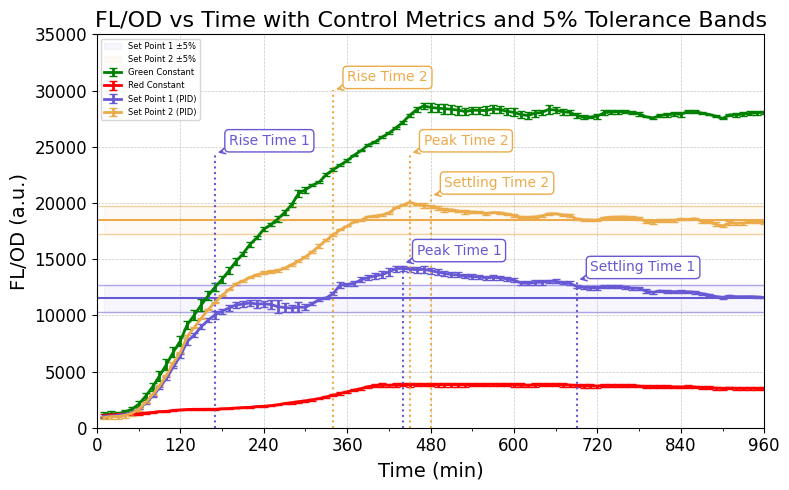

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# === Plot error bars ===
ax.errorbar(time, green_constant_avg, yerr=green_constant_std_dev, color=color_dict['green_constant'],
            label='Green Constant', capsize=3, linewidth=2)

ax.errorbar(time, red_constant_avg, yerr=red_constant_std_dev, color=color_dict['red_constant'],
            label='Red Constant', capsize=3, linewidth=2)

ax.errorbar(time, set_point_1_PI_avg, yerr=set_point_1_PI_std_dev, color=color_dict['set_point_1_PI'],
            label='Set Point 1 (PID)', capsize=3, linewidth=2)

ax.errorbar(time, set_point_2_PI_avg, yerr=set_point_2_PI_std_dev, color=color_dict['set_point_2_PI'],
            label='Set Point 2 (PID)', capsize=3, linewidth=2)

# === Setpoint lines ===
ax.axhline(st_pt_1, linestyle='-', color=color_dict['set_point_1_PI'], linewidth=1.5)
ax.axhline(st_pt_2, linestyle='-', color=color_dict['set_point_2_PI'], linewidth=1.5)

# === Tolerance bands (±1% of dynamic range) ===
for st_pt, color, label in [(st_pt_1, color_dict['set_point_1_PI'], 'Set Point 1'),
                            (st_pt_2, color_dict['set_point_2_PI'], 'Set Point 2')]:
    upper = st_pt + tolerance_band
    lower = st_pt - tolerance_band
    ax.axhline(upper, color=color, alpha=0.5, linewidth=1)
    ax.axhline(lower, color=color, alpha=0.5, linewidth=1)
    ax.fill_between(time, lower, upper, color=color, alpha=0.05, label=f'{label} ±5%')

# === Annotate control metrics ===
metrics = [
    (rise_time_1, 'Rise Time 1', color_dict['set_point_1_PI']),
    (peak_time_1, 'Peak Time 1', color_dict['set_point_1_PI']),
    (settling_time_1, 'Settling Time 1', color_dict['set_point_1_PI']),
    (rise_time_2, 'Rise Time 2', color_dict['set_point_2_PI']),
    (peak_time_2, 'Peak Time 2', color_dict['set_point_2_PI']),
    (settling_time_2, 'Settling Time 2', color_dict['set_point_2_PI']),
]

y_max = max(np.max(set_point_1_PI_avg + set_point_2_PI_avg), st_pt_2) * 1.10

# Custom Y positions (as fractions of y_max) for each label
annotation_y_positions = {
    'Rise Time 1': 0.65,
    'Peak Time 1': 0.39,
    'Settling Time 1': 0.35,
    'Rise Time 2': 0.80,
    'Peak Time 2': 0.65,
    'Settling Time 2': 0.55
}

# === Annotate control metrics at user-specified vertical positions ===
for x, label, color in metrics:
    y_frac = annotation_y_positions.get(label, 0.90)  # default to 90% if not specified
    y_pos = y_max * y_frac
    ax.plot([x, x], [0, y_pos], linestyle=':', color=color, linewidth=1.5)
    ax.annotate(label, xy=(x, y_pos),
                xytext=(x + 20, y_pos + 0.02 * y_max),
                arrowprops=dict(arrowstyle='->', lw=1.2, color=color),
                fontsize=10, color=color,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=1))

# === Formatting ===
ax.set_title('FL/OD vs Time with Control Metrics and 5% Tolerance Bands', fontsize=16)
ax.set_xlabel('Time (min)', fontsize=14)
ax.set_ylabel('FL/OD (a.u.)', fontsize=14)
ax.set_xlim(0, xlimit)
ax.set_ylim(0, 35000)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(fontsize=6, loc='upper left')
ax.xaxis.set_major_locator(ticker.MultipleLocator(120))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(60))

plt.tight_layout()
plt.show()

In [15]:
fold_change = np.max(green_constant_FL_by_OD)/np.max(red_constant_FL_by_OD)
fold_change

np.float64(7.169234726799723)

In [16]:
# # # ## Export the FL/OD data for modeling work 

# FL_OD_data = dict()

# FL_OD_data['G1'] = green_constant_FL_by_OD[0]
# FL_OD_data['G2'] = green_constant_FL_by_OD[1]
# FL_OD_data['G3'] = green_constant_FL_by_OD[2]

# FL_OD_data['SP2_1'] = set_point_2_PI_FL_by_OD[0]
# FL_OD_data['SP2_2'] = set_point_2_PI_FL_by_OD[1]
# FL_OD_data['SP2_3'] = set_point_2_PI_FL_by_OD[2]

# FL_OD_data['R1'] = red_constant_FL_by_OD[0]
# FL_OD_data['R2'] = red_constant_FL_by_OD[1]
# FL_OD_data['R3'] = red_constant_FL_by_OD[2]

# FL_OD_data['SP1_1'] = set_point_1_PI_FL_by_OD[0]
# FL_OD_data['SP1_2'] = set_point_1_PI_FL_by_OD[1]
# FL_OD_data['SP1_3'] = set_point_1_PI_FL_by_OD[2]

# FL_OD_data['NC'] = neg_ctrl_FL_by_OD[0]

# FL_OD_data['Time'] = time

# FL_OD_df = pd.DataFrame(data = FL_OD_data)
# FL_OD_df.to_csv('FL_OD_run_data_050725.csv')